### **Introduction to Convolutional Neural Networks and Computer Vision with TensorFlow**

**Computer Vision** is the practice of writing algorithms which can discover patterns in visual data. Such as the camera of a self-driving car recognizing a car in front.

### **Get the data**

In [20]:
import zipfile

# Unzip
zip_ref = zipfile.ZipFile('data/pizza_steak.zip')
zip_ref.extractall('data')
zip_ref.close()

### **Inspect the data**

A very crucial step at the beggining of every ML project is becoming one with the data. And for Computer Vision it usually means visualising many samples of your data.

In [21]:
import os
os.listdir('data/pizza_steak')

['test', 'train']

In [22]:
os.listdir('data/pizza_steak/train')

['pizza', 'steak']

In [23]:
os.listdir('data/pizza_steak/train/steak')[:5]

['1000205.jpg', '100135.jpg', '101312.jpg', '1021458.jpg', '1032846.jpg']

In [24]:
# Walk through pizza_stead directory and list number of files

for dirpath, dirnames, filenames in os.walk('data/pizza_steak'):
    print(f'There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}.')

There are 2 directories and 0 images in data/pizza_steak.
There are 2 directories and 0 images in data/pizza_steak\test.
There are 0 directories and 250 images in data/pizza_steak\test\pizza.
There are 0 directories and 250 images in data/pizza_steak\test\steak.
There are 2 directories and 0 images in data/pizza_steak\train.
There are 0 directories and 750 images in data/pizza_steak\train\pizza.
There are 0 directories and 750 images in data/pizza_steak\train\steak.


In [25]:
num_steak_images_train = len(os.listdir('data/pizza_steak/train/steak'))
num_steak_images_train

750

To visualize our images first let's get the class names programmatically.

In [26]:
# Get the class names programmatically
import pathlib
import numpy as np

data_dir = pathlib.Path('data/pizza_steak/train')
# Create a list of class names for the subdirectories
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) 
class_names

array(['pizza', 'steak'], dtype='<U5')

In [27]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
    # Setup the target directory
    target_folder = target_dir + '/' + target_class

    # Get a random image path
    random_image = random.sample(os.listdir(target_folder), 1)
    print(random_image)

    # Read in the image and plot it
    img = mpimg.imread(target_folder + '/' + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis('off');

    # Show the shape of the image
    print(f'Image shape: {img.shape}') 

    return img

['221048.jpg']
Image shape: (342, 512, 3)


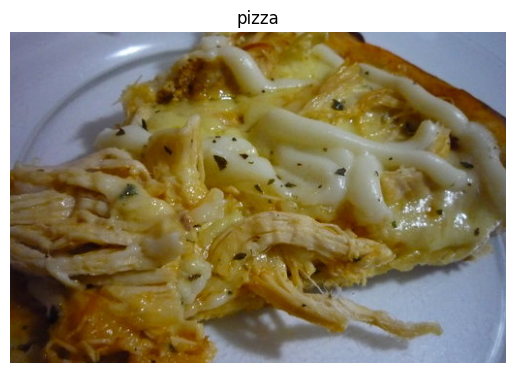

In [28]:
# View a random image from the training dataset
img = view_random_image(target_dir='data/pizza_steak/train',
                        target_class='pizza')

In [29]:
import tensorflow as tf

tf.constant(img)

<tf.Tensor: shape=(342, 512, 3), dtype=uint8, numpy=
array([[[117, 120, 151],
        [119, 122, 153],
        [121, 124, 155],
        ...,
        [112, 128, 161],
        [110, 126, 159],
        [109, 125, 158]],

       [[118, 121, 152],
        [119, 122, 153],
        [120, 123, 154],
        ...,
        [112, 128, 161],
        [111, 127, 160],
        [109, 125, 158]],

       [[119, 122, 153],
        [119, 122, 153],
        [119, 122, 153],
        ...,
        [114, 129, 162],
        [112, 127, 160],
        [111, 126, 159]],

       ...,

       [[ 81,  58,  24],
        [ 79,  56,  22],
        [ 77,  54,  20],
        ...,
        [103, 115, 141],
        [102, 114, 138],
        [101, 113, 137]],

       [[ 78,  55,  21],
        [ 77,  54,  20],
        [ 77,  54,  20],
        ...,
        [105, 117, 143],
        [105, 117, 141],
        [103, 115, 139]],

       [[ 77,  55,  18],
        [ 77,  55,  18],
        [ 77,  54,  20],
        ...,
        [105, 117, 14

In [30]:
img.shape # retuns (width, height, colour channels)

(342, 512, 3)

### **Data preprocessing**

**Normalization**

In [31]:
img/225.0

array([[[0.52      , 0.53333333, 0.67111111],
        [0.52888889, 0.54222222, 0.68      ],
        [0.53777778, 0.55111111, 0.68888889],
        ...,
        [0.49777778, 0.56888889, 0.71555556],
        [0.48888889, 0.56      , 0.70666667],
        [0.48444444, 0.55555556, 0.70222222]],

       [[0.52444444, 0.53777778, 0.67555556],
        [0.52888889, 0.54222222, 0.68      ],
        [0.53333333, 0.54666667, 0.68444444],
        ...,
        [0.49777778, 0.56888889, 0.71555556],
        [0.49333333, 0.56444444, 0.71111111],
        [0.48444444, 0.55555556, 0.70222222]],

       [[0.52888889, 0.54222222, 0.68      ],
        [0.52888889, 0.54222222, 0.68      ],
        [0.52888889, 0.54222222, 0.68      ],
        ...,
        [0.50666667, 0.57333333, 0.72      ],
        [0.49777778, 0.56444444, 0.71111111],
        [0.49333333, 0.56      , 0.70666667]],

       ...,

       [[0.36      , 0.25777778, 0.10666667],
        [0.35111111, 0.24888889, 0.09777778],
        [0.34222222, 0

### **An end-to-end example**

Let's build a Convolutional Neural Network to find patterns in our images, more specifically we need a way to:
* Load our images
* Preprocess our images
* Build a CNN to find patterns 
* Compile a CNN
* Fit a CNN to the training data

In [32]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 0 and 1 - normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup paths to our data directories
train_dir = 'data/pizza_steak/train'
test_dir = 'data/pizza_steak/train'

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               seed=42)

# # Build a CNN model
# model_1 = tf.keras.models.Sequential([
#     tf.keras.layers.Conv2D(filters=10, 
#                            kernel_size=3,
#                            activation='relu',
#                            input_shape=(224, 224, 3)),
#     tf.keras.layers.Conv2D(10, 3, activation='relu'),
#     tf.keras.layers.MaxPool2D(pool_size=2,
#                               padding='valid'),
#     tf.keras.layers.Conv2D(10, 3, activation='relu'),
#     tf.keras.layers.Conv2D(10, 3, activation='relu'),
#     tf.keras.layers.MaxPool2D(2),
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(1, activation='sigmoid')
# ])

# # Compile a CNN
# model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
#                 optimizer=tf.keras.optimizers.Adam(),
#                 metrics=['accuracy'])

# history_1 = model_1.fit(train_data,
#                         epochs=5,
#                         steps_per_epoch=len(train_data),
#                         validation_data=valid_data,
#                         validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.


In [33]:
#model_1.summary()

### **Save a model**

In [34]:
#model_1.save('saved_models/cnn_model_1')

### **Load a model**

In [35]:
loaded_SaveModel_format = tf.keras.models.load_model('saved_models/cnn_model_1')
loaded_SaveModel_format.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    